In [1]:
from ROOT import *

Welcome to JupyROOT 6.26/00


In [2]:
file = TFile.Open("TEST10GeV.root", "READ")
tree = file.Get("Position")

In [3]:
hist = TH1F("number of photons per run", "", 10000, 0, 10000)
FZ = []
FY = []

In [4]:
for entry in tree:
    hist.Fill(entry.fEvent)
    FZ.append(entry.fZ)
    FY.append(entry.fY)

In [5]:
S = 0
ZY = []
for i in range(10000):
    N = []
    for j in range(S, S + int(hist.GetBinContent(i+1))):
        N.append((FZ[j],FY[j]))
        S = S + 1
    ZY.append(N)

In [6]:
ZY_new = []
for i in range(10000):
    ZY_new.append(list(set(ZY[i])))

In [11]:
h2p = TH2Poly("123", "123", 0.9, 1.0, -0.04, 0.20);

In [12]:
dx=57.5/10000 
dy=62.5/10000
for i in range(26):
    for j in range(225):
        h2p.AddBin(dx*j, i*dy-3*dy, (j+1)*dx, (i+1)*dy-3*dy)

In [13]:
for j in range(len(ZY[0])):
    h2p.Fill(ZY[0][j][0],ZY[0][j][1])

In [14]:
a=1
print(ZY[0][a][0],ZY[0][a][1])

0.968875 0.103125


In [15]:
c2 = TCanvas()

In [16]:
h2p.Draw("TEXT")

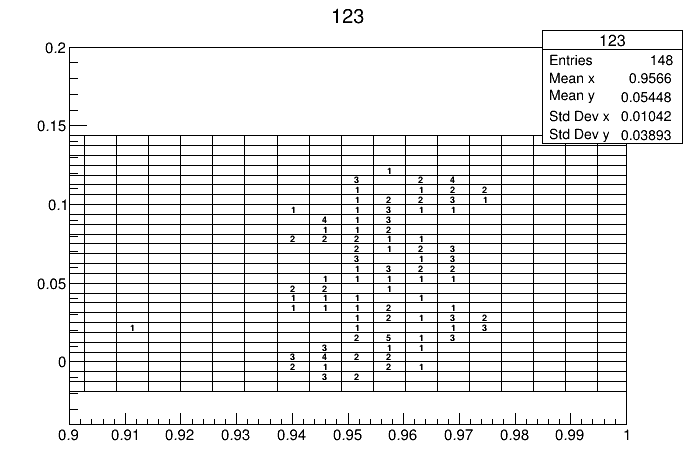

In [17]:
c2.Draw()

In [31]:
h1p = TH2Poly("1231", "1231", 0.9, 1.0, -4-0.04, 0.20-4);

In [32]:
dx=57.5/10000 
dy=62.5/10000
for i in range(26):
    for j in range(225):
        h1p.AddBin(dx*j, i*dy-3*dy-4, (j+1)*dx, (i+1)*dy-3*dy-4)

In [33]:
for j in range(len(ZY_new[0])):
    h1p.Fill(ZY_new[0][j][0],ZY_new[0][j][1])

In [36]:
c3 = TCanvas()

In [37]:
h1p.Draw("TEXT")

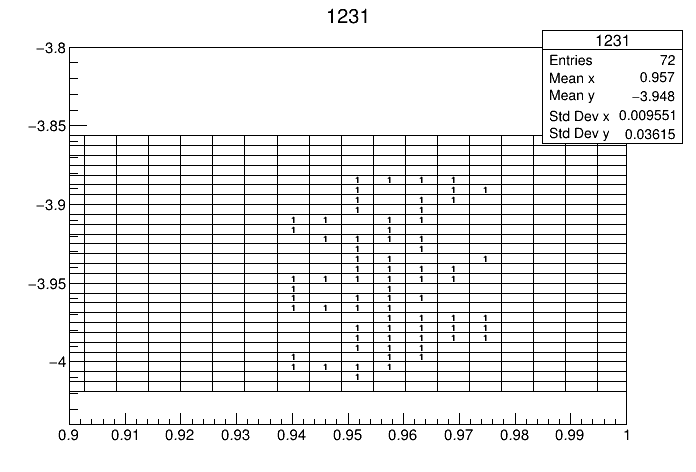

In [38]:
c3.Draw()

In [16]:
ZY_NEW = []
for i in range(10000):
    M = []
    for j in range(len(ZY_new[i])):
        if ZY_new[i][j][0] >= 0.9085 and ZY_new[i][j][0] <= 1.0005:
            M.append(ZY_new[i][j])
    ZY_NEW.append(M)

In [28]:
h = TH1F("h", "", 50, -50, 50)
f = TF1("fit", "gaus", -50, 50)

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


In [29]:
S = 0
for i in range(0, 10000):
    Z = 0.
    if len(ZY_NEW[i]) != 0:
        for j in range(len(ZY_NEW[i])):
            Z = Z + (4*(floor(ZY_NEW[i][j][0]/0.023)+1)-2)*0.00575*10000
            S = S + 1
        h.Fill(Z/len(ZY_NEW[i]) - 9566)

In [30]:
c = TCanvas()

In [31]:
h.Draw()

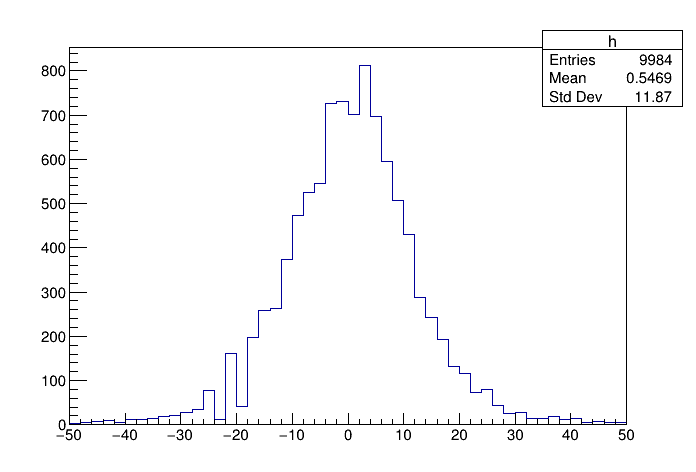

In [32]:
c.Draw()

In [33]:
points = []
errors = []
h.Fit("fit")
points.append(float(f.GetParameter(2)))
errors.append(float(f.GetParError(2)))

 FCN=582.732 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=5.82789e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.27342e+02   9.98026e+00   9.02433e-02  -3.30491e-06
   2  Mean         1.15692e+00   1.06921e-01   1.23048e-03   2.12649e-04
   3  Sigma        9.91706e+00   8.73654e-02   2.36825e-05  -7.64772e-03


In [34]:
print(points[0]*2.355, errors[0]*2.355)

23.354681571554924 0.20574553599066472


In [39]:
c1 = TCanvas()

In [41]:
h.Draw()
h.SetStats(1)
h.GetXaxis().SetTitle("z /micrometers")

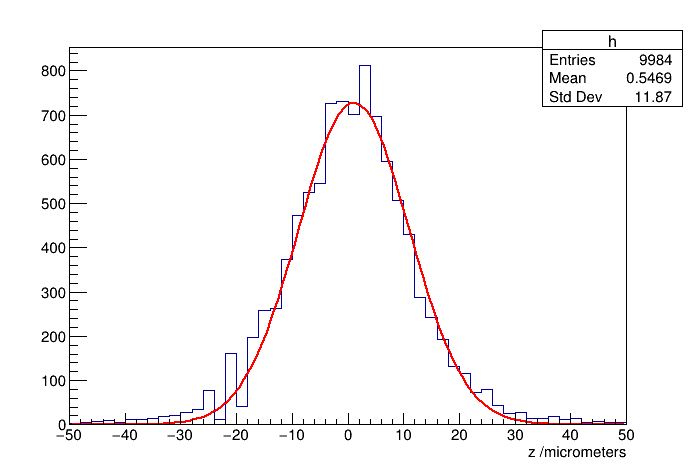

In [42]:
c1.Draw()

In [38]:
c1.Print("resol10GeV.C")

Info in <TCanvas::SaveSource>: C++ Macro file: resol10GeV.C has been generated
